# Crime Classification Problem

The dataset used serves as a gateway to exploring the world of crime incidents. Each entry encapsulates a unique narrative, featuring details such as incident locations, victim demographics, and other key attributes. The task is to explore this comprehensive dataset and construct predictive models that can forecast the category of crime for each incident.

# Loading the Necessary Libraries and Modules

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit, GridSearchCV

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_selection import VarianceThreshold, RFECV, RFE, SequentialFeatureSelector

from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import uniform,loguniform, randint
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

import xgboost as xgb

# Data Loading

In [10]:
train_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv",sep=',')
test_data=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv",sep=',')


# Exploratory Data Analysis

In [10]:

print("Train Data Info")
train_data.info()

print("\n\nTest Data Info")
test_data.info()


print("\n\nTrain Data Description")
print(train_data.describe(include='all'))

print("\n\nTest Data Description")
print(test_data.describe(include='all'))


Train Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null 

**Important Observations**


1. Numeric Columns:

* Latitude
* Longitude
* Time_Occurred
* Area_ID
* Reporting_District_no
* Part 1-2
* Victim_Age
* Premise_Code
* Weapon_Used_Code

2. Categorical Columns:
* Location
* Cross_Street
* Date_Reported
* Date_Occurred
* Area_Name
* Modus_Operandi
* Victim_Sex
* Victim_Descent
* Premise_Description
* Weapon_Description
* Status
* Status_Description
* Crime_Category (only in train data)

3. Observations about the numeric_features:
* Latitude and Longitude columns have 0 values. This is unusual when we look at the mean and the standard deviation for the Latitude and the Longitude.
* The values for the Time Occured column ranges from 1 to 2359, which tells us that this column indicates the Time in 24 hr format, but is not stored correctly.
* The minimum value for the Victim age is -2, which indicates that wrong values are present in that column.
* Part 1 crimes indicate serious crimes, and Part 2 crimes indicate less serious crimes. A mean value of 1.42 indicates that there is almost a fair number of Part 1 and Part 2 crimes.

4. Observations about the categorical features:
* We can see that the Area Name and the Area ID represent the same kind of data.
* We can see that the Premise_Description and the Premise_code represent the same data.
* We can see that the Status and the Status_Description represent the same data.
* We can see that the Weapon_Description and the Weapon_Used_Code represent the same data.
* So it is safe to drop these columns.



Missing Values in Train Data
Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64


Missing Values in Test Data
Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area

<Figure size 1200x600 with 0 Axes>

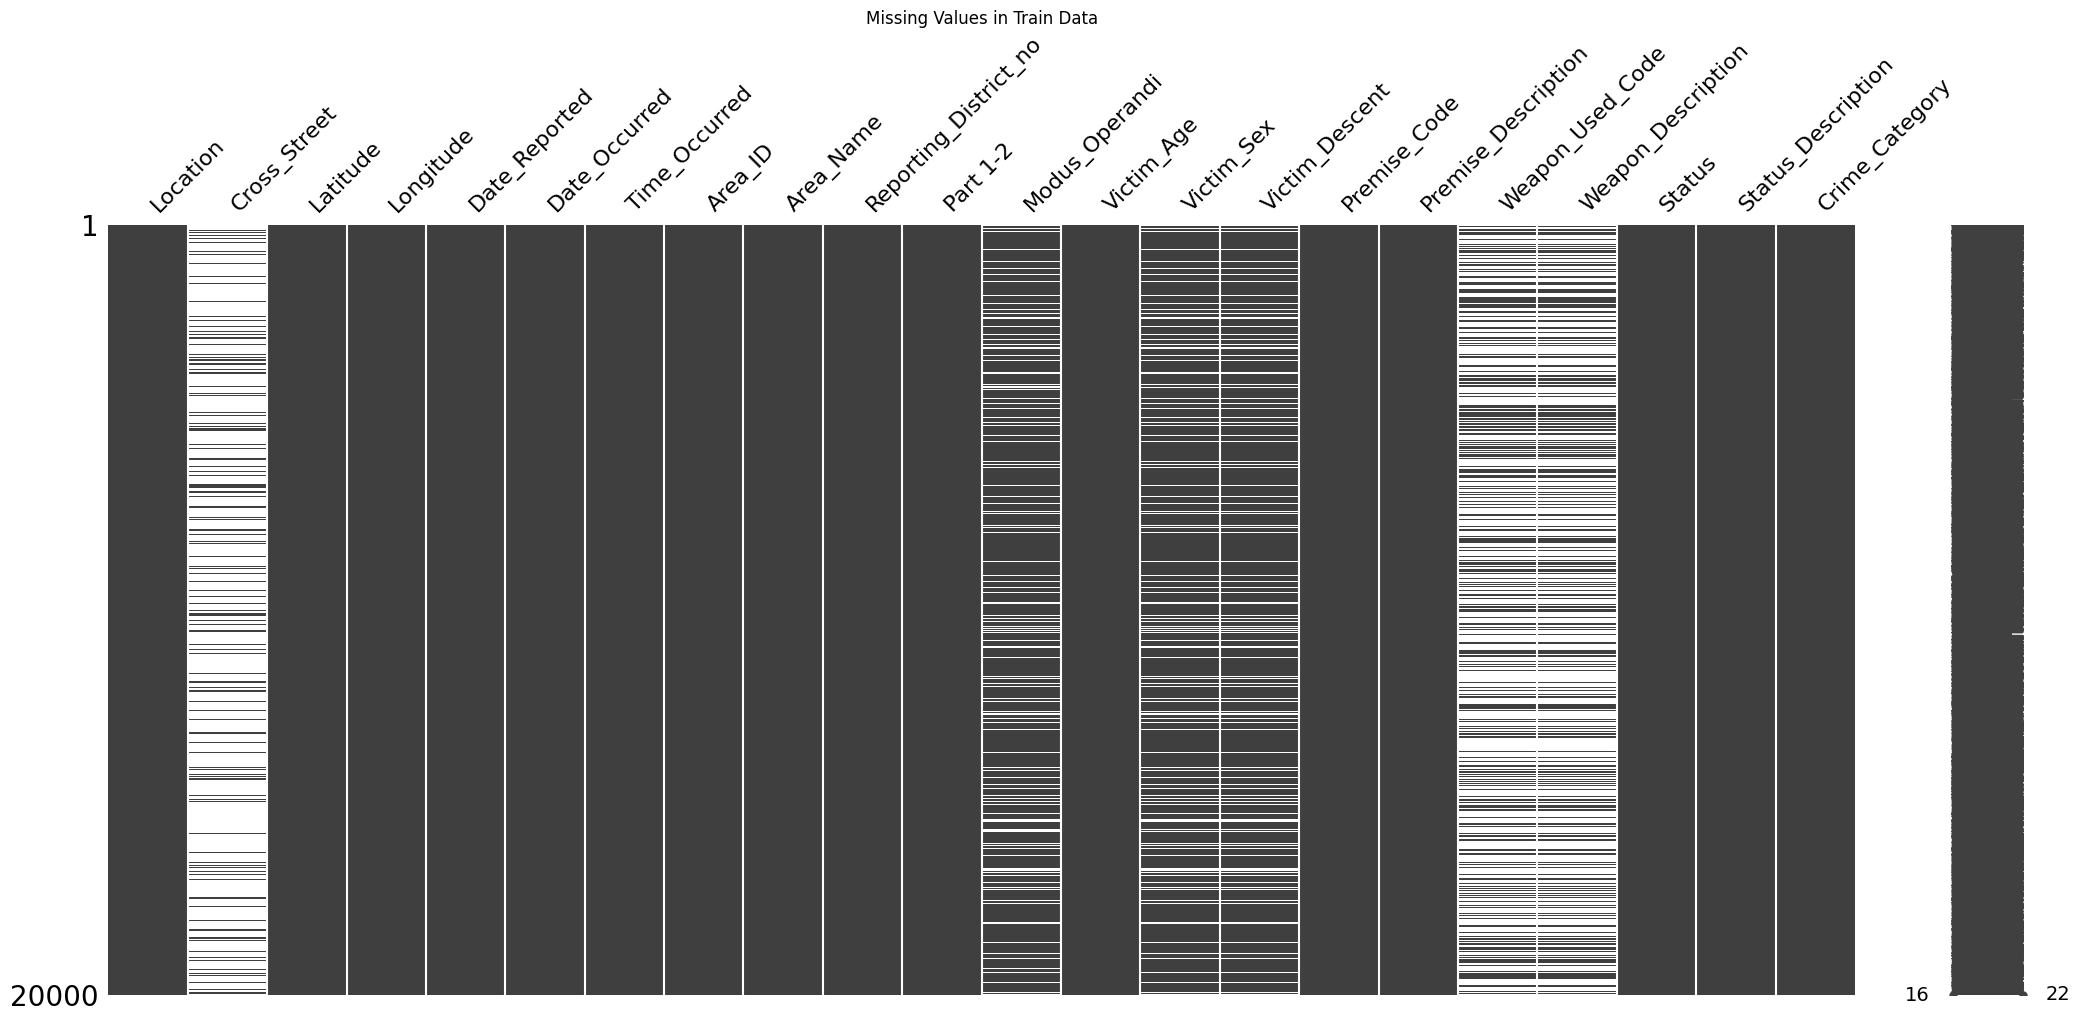

<Figure size 1200x600 with 0 Axes>

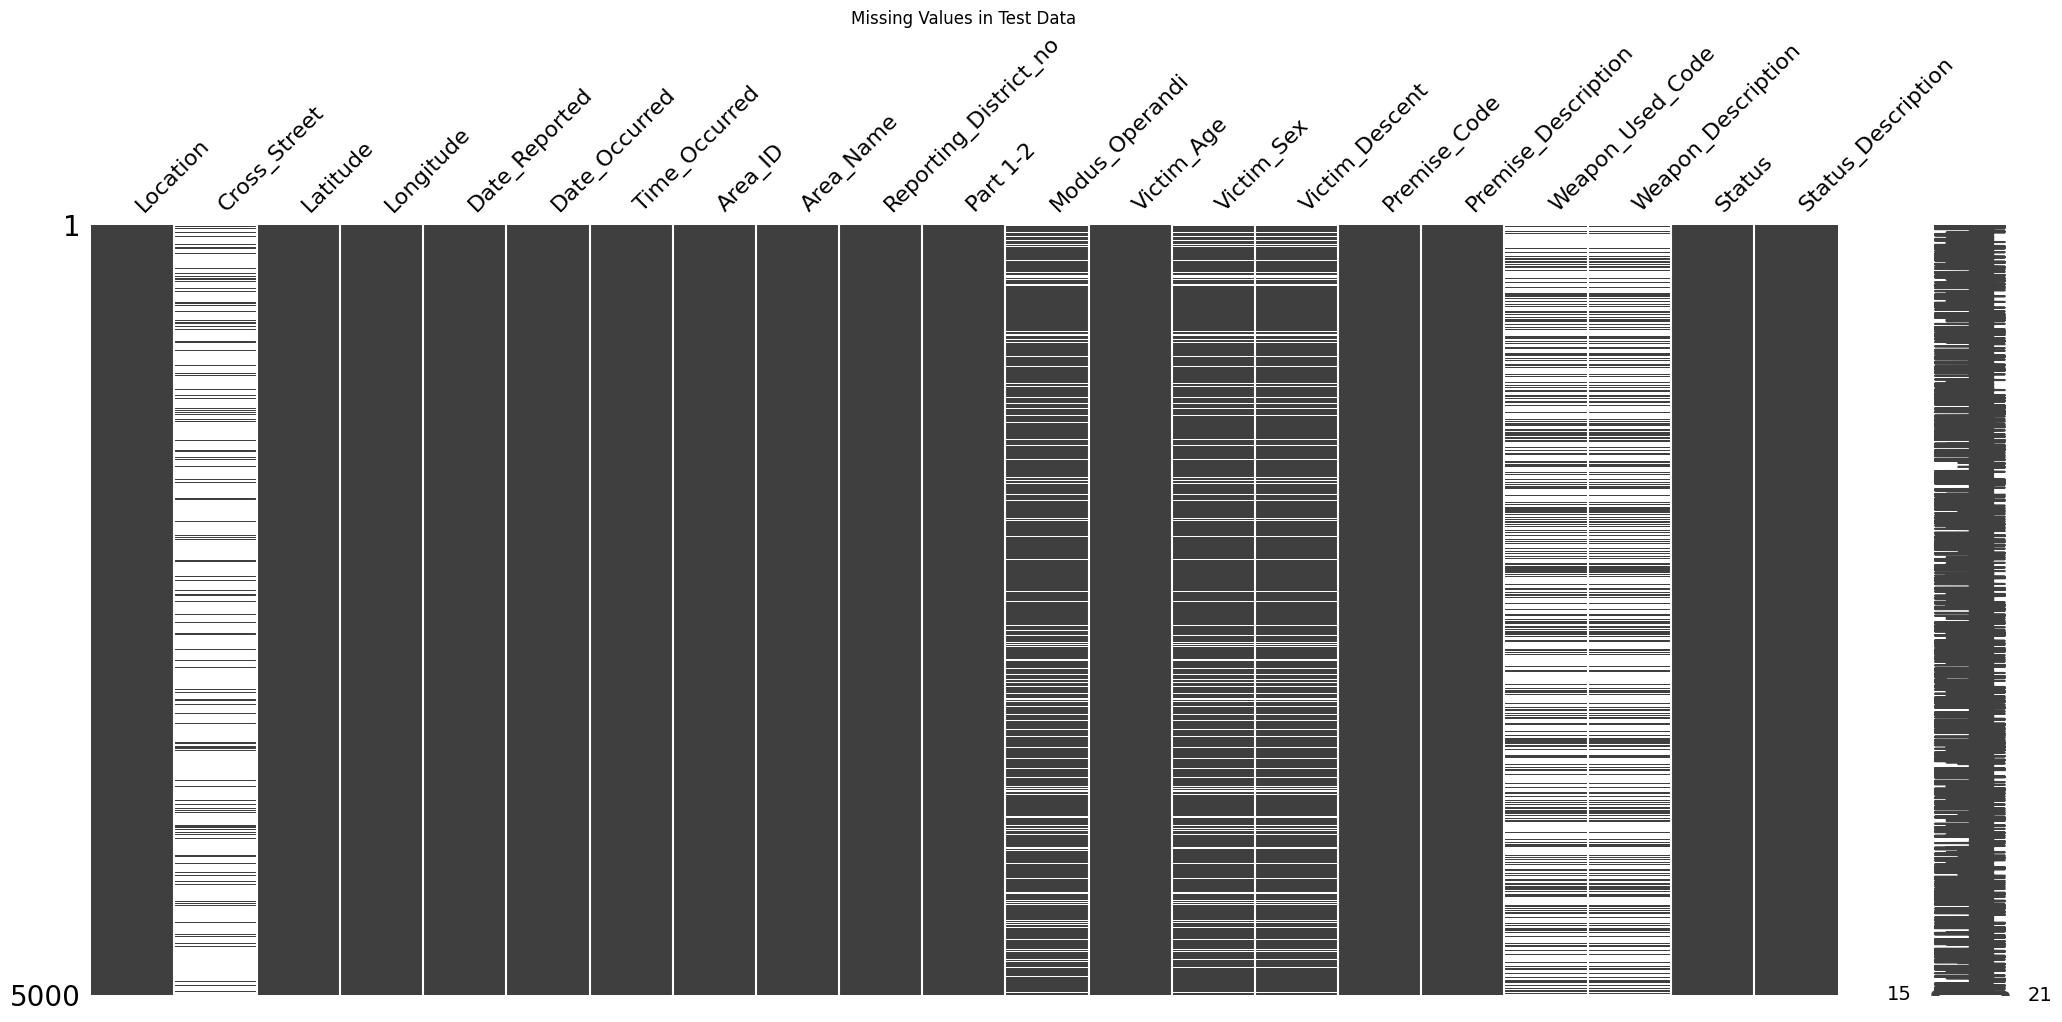

In [11]:
import missingno as msno


# Checking for missing values
print("\n\nMissing Values in Train Data")
print(train_data.isnull().sum())

print("\n\nMissing Values in Test Data")
print(test_data.isnull().sum())


plt.figure(figsize=(12, 6))
msno.matrix(train_data)
plt.title('Missing Values in Train Data')
plt.show()

plt.figure(figsize=(12, 6))
msno.matrix(test_data)
plt.title('Missing Values in Test Data')
plt.show()


**Observations**

* Here we can see that there are missing values in the same columns in both the training and the test data.
* The test data has the same proportion of missing datas as in the training data.
* More than half of the data is missing in the Weapon Used code and description, Cross_Street in both the training and test data. So simple imputation is not going to work.


Target Variable Distribution (Train Data):
Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64


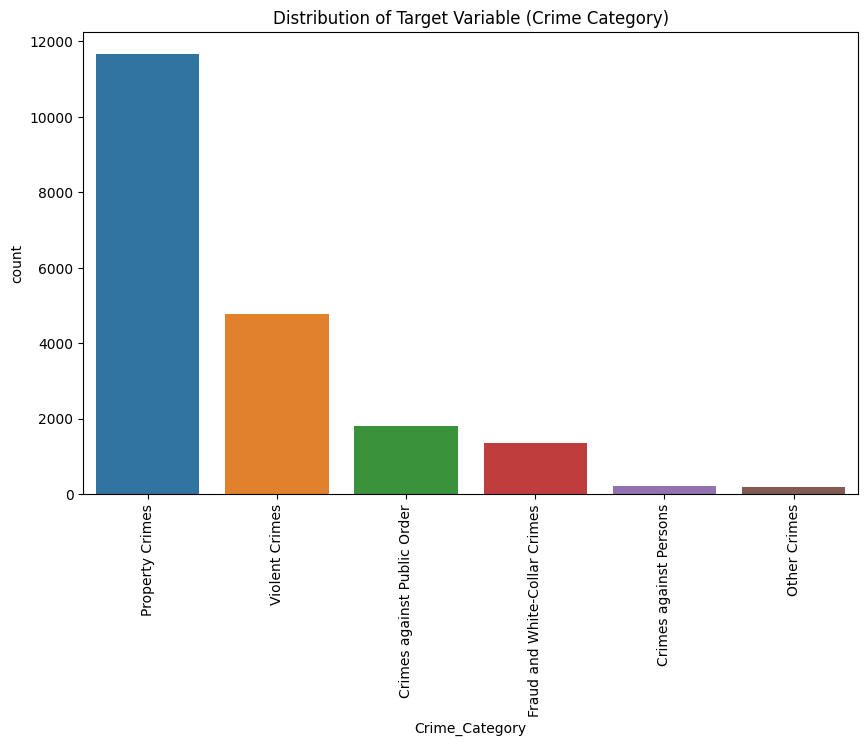

In [12]:

print("Target Variable Distribution (Train Data):")
print(train_data['Crime_Category'].value_counts())

# Target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Crime_Category', data=train_data, order=train_data['Crime_Category'].value_counts().index)
plt.title('Distribution of Target Variable (Crime Category)')
plt.xticks(rotation=90)
plt.show()


**Important Observations**

1. There is imbalance in the target classes. So we have to use StatifiedShuffleSplit so that the proportion of classes in the target label is properly represented.

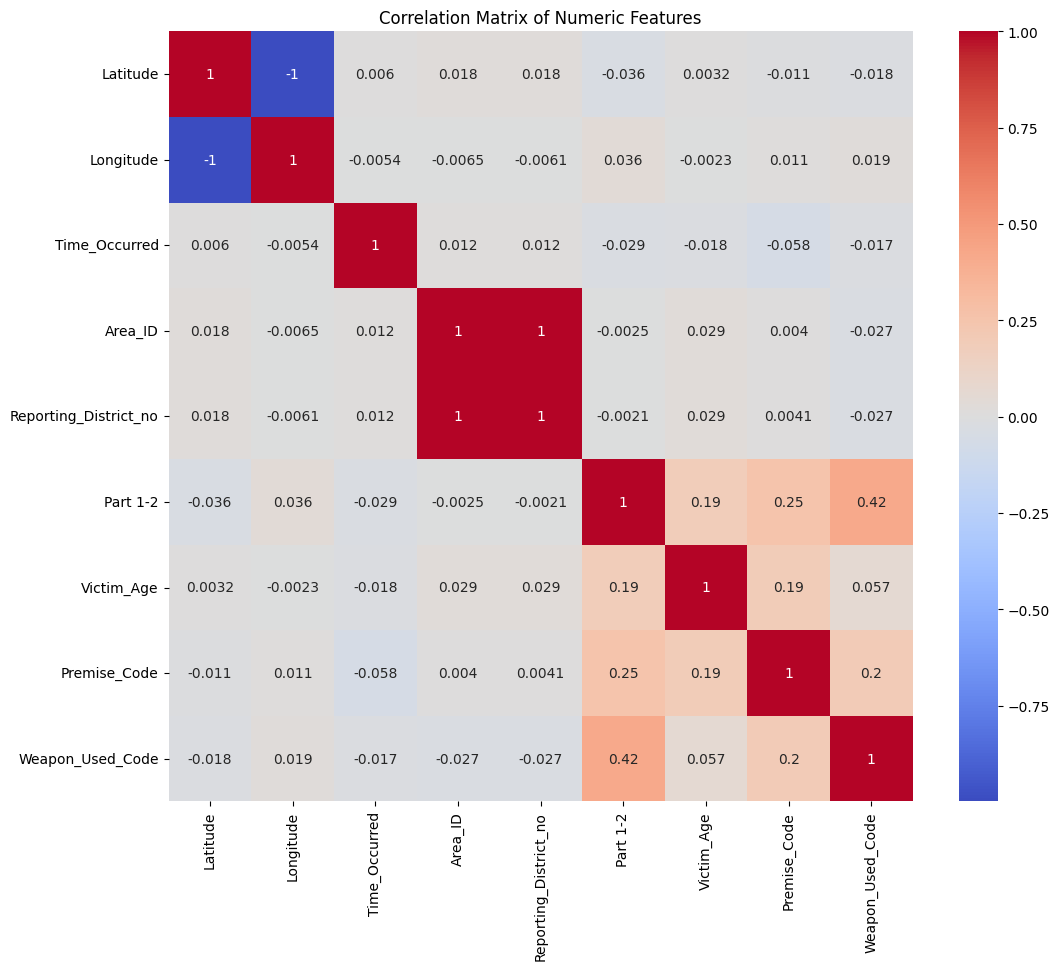

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


**Important Observations**

* The Area_ID and the Reporting_District_no have a very strong positive correlation, indicating that these two features may represent the same data, just in different forms.
* The Latitude and the Longitude have a very strong negative correlation, indicating that as one increases, the other decreases almost perfectly.
* Part 1-2 shows a good positive correlation with 'Weapon_Used_code' indicating that the weapon used may indicate the type of crime.
* Part 1-2 shows a good positive correlation with 'Premise_Code' indicating that the location of the crime may indicate the type of crime.


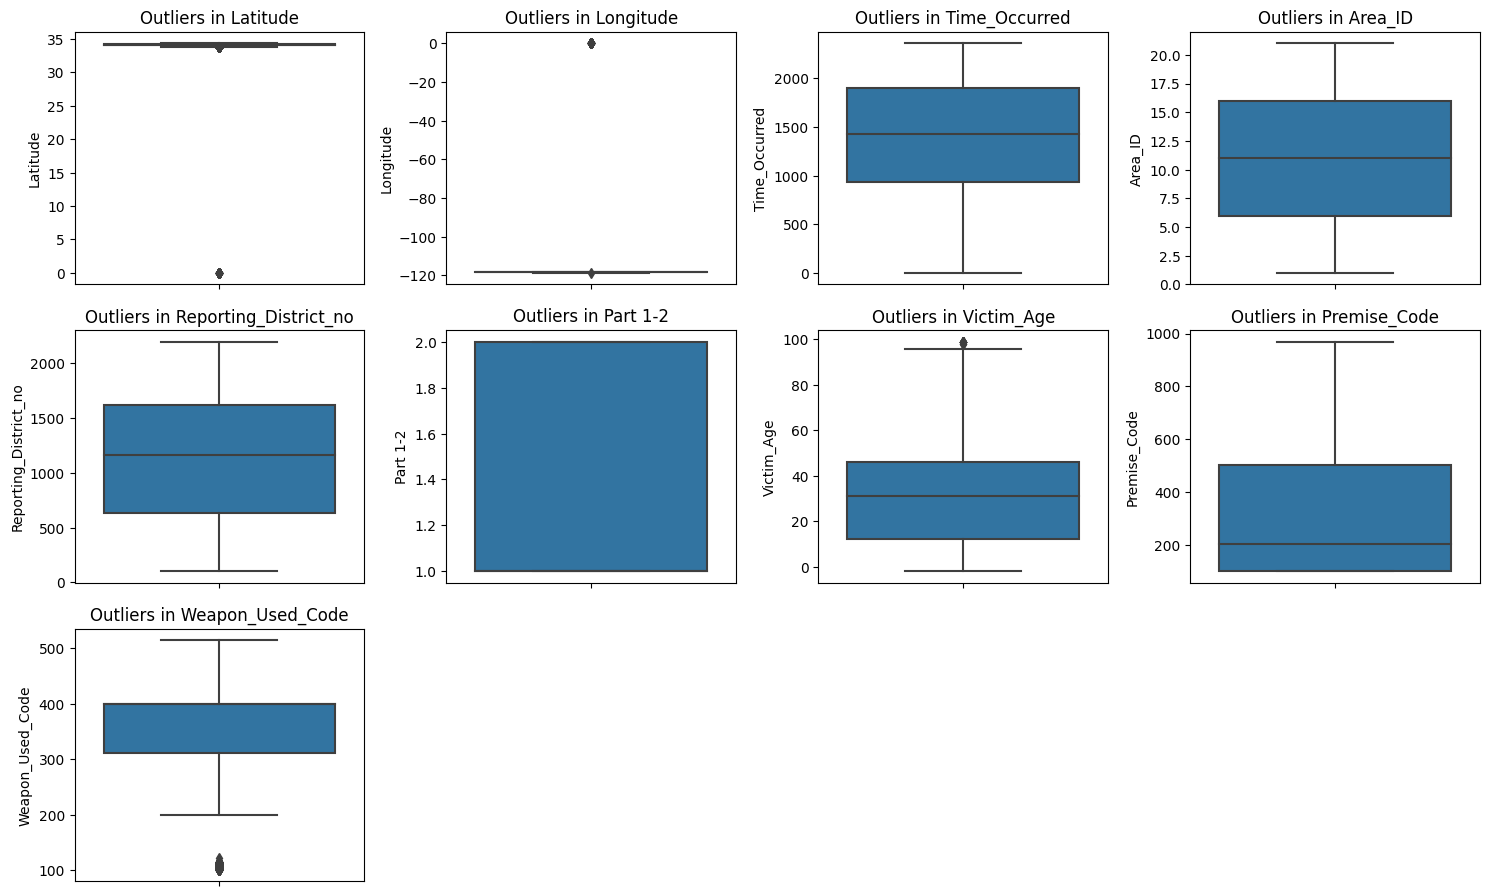

In [14]:
# Boxplots for outlier detection in numeric features
numeric_features = train_data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=train_data[feature])
    plt.title(f'Outliers in {feature}')
plt.tight_layout()
plt.show()


**Important Observations**

* There is a lot of clustering between the 25th and the 75th percentile in the Latitude and the Longitude columns. This indicates that the 0 values are an error in the column.

* The Time Occured ranges from 1 to 2359. This indicates that the time is recorded in 24 hr format and needs to be engineered.

* The Age values range from -2 to 99, which indicates that there are errors present in the column.

* There are a lot of outliers and imbalances in the Weapon_Used_Code data, indicating the need for KNNIMputer


# Feature Engineering

In [11]:
train_data['Cross_Street'] = train_data['Cross_Street'].fillna('Unknown')
test_data['Cross_Street'] = test_data['Cross_Street'].fillna('Unknown')

train_data['Victim_Age'] = np.where(train_data['Victim_Age'] < 5, np.nan, train_data['Victim_Age'])
test_data['Victim_Age'] = np.where(test_data['Victim_Age'] < 5, np.nan, test_data['Victim_Age'])

train_data['Latitude'] = train_data['Latitude'].replace(0, np.nan)
test_data['Latitude'] = test_data['Latitude'].replace(0, np.nan)

train_data['Longitude'] = train_data['Longitude'].replace(0, np.nan)
test_data['Longitude'] = test_data['Longitude'].replace(0, np.nan)

train_data['Date_Reported'] = pd.to_datetime(train_data['Date_Reported'], errors='coerce').dt.strftime('%m-%d-%Y')
test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], errors='coerce').dt.strftime('%m-%d-%Y')

train_data['Date_Occurred'] = pd.to_datetime(train_data['Date_Occurred'], errors='coerce').dt.strftime('%m-%d-%Y')
test_data['Date_Occurred'] = pd.to_datetime(test_data['Date_Occurred'], errors='coerce').dt.strftime('%m-%d-%Y')

train_data=train_data.drop(columns=['Area_Name','Weapon_Description','Premise_Description','Status_Description'],axis=1)
test_data=test_data.drop(columns=['Area_Name','Weapon_Description','Premise_Description','Status_Description'],axis=1)

def standardize_time_occurred(time_value):
    time_str = str(int(time_value)).zfill(4)
    if len(time_str) == 3:
        time_str = '0' + time_str
    elif len(time_str) == 2:
        time_str = time_str + '00'
    elif len(time_str) == 1:
        time_str = '0' + time_str + '00'
    return time_str

train_data['Time_Occurred'] = train_data['Time_Occurred'].apply(standardize_time_occurred)
test_data['Time_Occurred'] = test_data['Time_Occurred'].apply(standardize_time_occurred)
#print(train_data['Time_Occurred'].head(50))


train_data['Date_Occurred'] = pd.to_datetime(train_data['Date_Occurred'], format='%m-%d-%Y')
train_data['Date_Reported'] = pd.to_datetime(train_data['Date_Reported'], format='%m-%d-%Y')


test_data['Date_Occurred'] = pd.to_datetime(test_data['Date_Occurred'], format='%m-%d-%Y')
test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], format='%m-%d-%Y')


train_data['Days_to_report'] = (train_data['Date_Reported'] - train_data['Date_Occurred']).dt.days
test_data['Days_to_report'] = (test_data['Date_Reported'] - test_data['Date_Occurred']).dt.days


train_data=train_data.drop(columns=['Date_Reported'],axis=1)
test_data=test_data.drop(columns=['Date_Reported'],axis=1)

def extract_date_features(df):
    df['Year_Occurred'] = df['Date_Occurred'].dt.year
    df['Month_Occurred'] = df['Date_Occurred'].dt.month
    df['Day_Occurred'] = df['Date_Occurred'].dt.day
    df['DayOfWeek_Occurred'] = df['Date_Occurred'].dt.dayofweek
    return df.drop(columns=['Date_Occurred'])

# Function to extract time features
def extract_time_features(df):
    df['Hour_Occurred'] = df['Time_Occurred'].astype(str).str[:2].astype(int)
    return df.drop(columns=['Time_Occurred'])

train_data=extract_date_features(train_data)
train_data=extract_time_features(train_data)

test_data=extract_date_features(test_data)
test_data=extract_time_features(test_data)

train_data.info()

/tmp/ipykernel_33/3564381607.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Date_Reported'] = pd.to_datetime(train_data['Date_Reported'], errors='coerce').dt.strftime('%m-%d-%Y')
/tmp/ipykernel_33/3564381607.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], errors='coerce').dt.strftime('%m-%d-%Y')
/tmp/ipykernel_33/3564381607.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Date_Occurred'] = pd.to_datetime(train_data['Date_Occurred'], errors='coerce').dt.strftime('%m

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               19922 non-null  float64
 3   Longitude              19922 non-null  float64
 4   Area_ID                20000 non-null  float64
 5   Reporting_District_no  20000 non-null  float64
 6   Part 1-2               20000 non-null  float64
 7   Modus_Operandi         17259 non-null  object 
 8   Victim_Age             15142 non-null  float64
 9   Victim_Sex             17376 non-null  object 
 10  Victim_Descent         17376 non-null  object 
 11  Premise_Code           20000 non-null  float64
 12  Weapon_Used_Code       7335 non-null   float64
 13  Status                 20000 non-null  object 
 14  Crime_Category         20000 non-null  object 
 15  Da

In [12]:
def add_time_features(df):

    df['Time_Bin'] = pd.cut(df['Hour_Occurred'], 
                            bins=[0, 6, 12, 18, 24], 
                            labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                            include_lowest=True)
    
    df['Season'] = pd.cut(df['Month_Occurred'], 
                          bins=[0, 3, 6, 9, 12], 
                          labels=['Winter', 'Spring', 'Summer', 'Fall'], 
                          include_lowest=True)
    
    df['Is_Weekend'] = df['DayOfWeek_Occurred'].isin([5, 6]).astype(int)
    
    return df

# Apply the function to both train and test data
train_data = add_time_features(train_data)
test_data = add_time_features(test_data)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to process Modus_Operandi
def process_modus_operandi(train_data, test_data, max_features=100):
    
    all_modus = pd.concat([train_data['Modus_Operandi'], test_data['Modus_Operandi']])
    
    
    tfidf = TfidfVectorizer(max_features=max_features, 
                            stop_words='english', 
                            token_pattern=r'\b\w+\b')
    tfidf.fit(all_modus.fillna(''))
    
    
    train_tfidf = tfidf.transform(train_data['Modus_Operandi'].fillna(''))
    test_tfidf = tfidf.transform(test_data['Modus_Operandi'].fillna(''))
    
    # Convert to DataFrame
    train_tfidf_df = pd.DataFrame(train_tfidf.toarray(), 
                                  columns=[f'MO_{i}' for i in range(max_features)])
    test_tfidf_df = pd.DataFrame(test_tfidf.toarray(), 
                                 columns=[f'MO_{i}' for i in range(max_features)])
    
   
    train_data = pd.concat([train_data, train_tfidf_df], axis=1)
    test_data = pd.concat([test_data, test_tfidf_df], axis=1)
    
    train_data = train_data.drop('Modus_Operandi', axis=1)
    test_data = test_data.drop('Modus_Operandi', axis=1)
    
    return train_data, test_data


train_data, test_data = process_modus_operandi(train_data, test_data)

In [14]:
target = 'Crime_Category'
features = train_data.drop(columns=[target])
target = train_data[target]

print(features.describe())

           Latitude     Longitude       Area_ID  Reporting_District_no  \
count  19922.000000  19922.000000  20000.000000           20000.000000   
mean      34.073591   -118.354656     10.834250            1129.599200   
std        0.113439      0.103489      6.033166             603.330519   
min       33.707000   -118.663400      1.000000             101.000000   
25%       34.010300   -118.430375      6.000000             632.000000   
50%       34.059100   -118.323700     11.000000            1162.000000   
75%       34.166000   -118.275300     16.000000            1622.000000   
max       34.328100   -118.159300     21.000000            2197.000000   

           Part 1-2    Victim_Age  Premise_Code  Weapon_Used_Code  \
count  20000.000000  15142.000000  20000.000000       7335.000000   
mean       1.418150     39.799102    297.176950        366.405044   
std        0.493267     15.711518    212.007298        120.485687   
min        1.000000      5.000000    101.000000        10

# Data Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('scaler', StandardScaler())
])

knn_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

numeric_features1 = ['Latitude', 'Longitude', 'Victim_Age', 'Area_ID', 'Reporting_District_no',
                    'Premise_Code', 'Part 1-2', 'Days_to_report', 'Year_Occurred', 
                    'Month_Occurred', 'Day_Occurred', 'DayOfWeek_Occurred', 'Hour_Occurred', 
                    'Is_Weekend' ]

numeric_features2=[f'MO_{i}' for i in range(100)]
numeric_features=numeric_features1+numeric_features2
categorical_features = ['Location', 'Victim_Sex', 'Victim_Descent', 'Status', 'Cross_Street', 
                        'Time_Bin', 'Season']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('knn', knn_transformer, ['Weapon_Used_Code'])
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])



X = pipeline.fit_transform(features)


numeric_names = numeric_features
categorical_names = categorical_features
knn_feature_name = ['Weapon_Used_Code']



feature_names = np.concatenate([numeric_names, categorical_names, knn_feature_name])
X = pd.DataFrame(X, columns=feature_names)

print("X values")
print(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target)
print("Y values")
print(y)


X values
       Latitude  Longitude  Victim_Age   Area_ID  Reporting_District_no  \
0      0.694330  -0.351887    2.574977  0.690492               0.718365   
1     -0.625282   1.118807    0.087847  0.358983               0.393494   
2     -0.551970   0.865139    1.989770  0.358983               0.353713   
3      1.958296  -1.010263    1.550864  1.353511               1.316725   
4     -0.838151   0.608566    0.000000  0.193228               0.191278   
...         ...        ...         ...       ...                    ...   
19995 -0.355000   0.022806    0.819356 -1.298563              -1.370095   
19996  1.303789  -1.417874    0.000000 -0.138281              -0.201552   
19997 -0.145664  -0.259908    0.160998 -0.469790              -0.465095   
19998 -2.901481   0.688927    2.648128 -0.967054              -0.947430   
19999 -0.617333   0.496255    0.000000 -1.298563              -1.214289   

       Premise_Code  Part 1-2  Days_to_report  Year_Occurred  Month_Occurred  \
0         

# Test-Train Split

In [16]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, target):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Feature Extraction

**Using the more reliable Random Forest Classifier for RFECV to find out the optimum features**

Index(['Latitude', 'Longitude', 'Victim_Age', 'Area_ID',
       'Reporting_District_no', 'Premise_Code', 'Part 1-2', 'Days_to_report',
       'Month_Occurred', 'Day_Occurred',
       ...
       'MO_97', 'MO_99', 'Location', 'Victim_Sex', 'Victim_Descent', 'Status',
       'Cross_Street', 'Time_Bin', 'Season', 'Weapon_Used_Code'],
      dtype='object', length=106)
X_train_rfecv shape: (16000, 106)
X_test_rfecv shape: (4000, 106)
y_train shape: (16000,)
y_test shape: (4000,)
 Number of Features    Score
                106 0.951812
                102 0.951562
                 83 0.951375
                 67 0.951250
                 89 0.951187
                122 0.951125
                 65 0.951125
                 82 0.951063
                107 0.951062
                 66 0.951062
                 92 0.951000
                101 0.951000
                 72 0.950937
                 81 0.950937
                109 0.950875
                 64 0.950812
                 84 0.950750


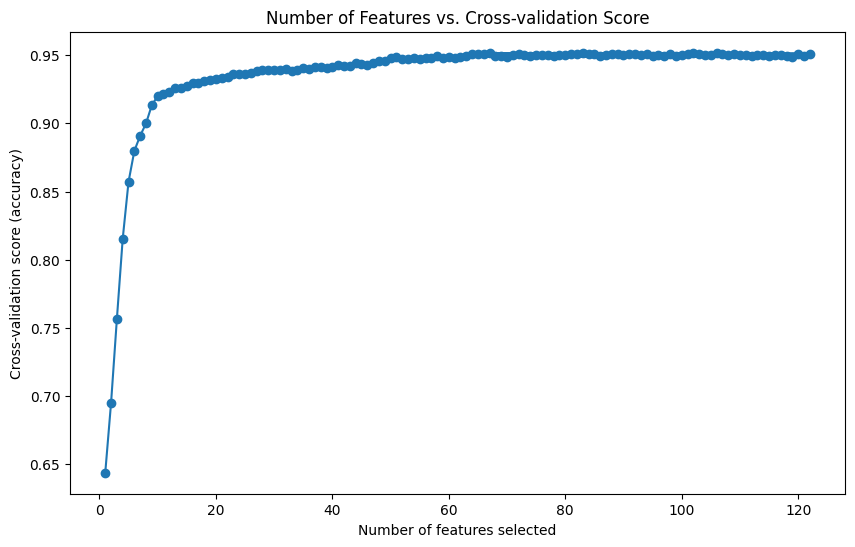

In [21]:
rf_clf = RandomForestClassifier(random_state=42)

rfecv = RFECV(estimator=rf_clf, step=1, cv=5, scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)

selected_features = X.columns[rfecv.support_]
print(selected_features)


X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)


print("X_train_rfecv shape:", X_train_rfecv.shape)
print("X_test_rfecv shape:", X_test_rfecv.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

num_features = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)
scores = rfecv.cv_results_['mean_test_score']

feature_score_df = pd.DataFrame({'Number of Features': num_features, 'Score': scores})

sorted_feature_score_df = feature_score_df.sort_values(by='Score', ascending=False)

print(sorted_feature_score_df.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(sorted_feature_score_df['Number of Features'], sorted_feature_score_df['Score'], marker='o')
plt.title('Number of Features vs. Cross-validation Score')
plt.show()


In [22]:
'''selected_features = X.columns[rfecv.support_].tolist()
print(selected_features)'''

'selected_features = X.columns[rfecv.support_].tolist()\nprint(selected_features)'

In [17]:
selected_columns_after_rfecv=['Latitude', 'Longitude', 'Victim_Age', 'Area_ID', 
'Reporting_District_no', 'Premise_Code', 'Part 1-2', 'Days_to_report', 'Month_Occurred',
'Day_Occurred', 'DayOfWeek_Occurred', 'Hour_Occurred', 'Is_Weekend', 'MO_0', 'MO_2', 'MO_3',
'MO_4', 'MO_5', 'MO_6', 'MO_7', 'MO_8', 'MO_9', 'MO_10', 'MO_11', 'MO_12', 'MO_13', 'MO_14', 
'MO_16', 'MO_17', 'MO_18', 'MO_19', 'MO_20', 'MO_22', 'MO_23', 'MO_24', 'MO_26', 'MO_28', 
'MO_29', 'MO_30', 'MO_31', 'MO_32', 'MO_33', 'MO_34', 'MO_35', 'MO_36', 'MO_37', 'MO_38', 
'MO_39', 'MO_40', 'MO_41', 'MO_42', 'MO_43', 'MO_44', 'MO_45', 'MO_46', 'MO_50', 'MO_51', 
'MO_52', 'MO_53', 'MO_54', 'MO_55', 'MO_56', 'MO_57', 'MO_58', 'MO_59', 'MO_60', 'MO_61',
'MO_62', 'MO_63', 'MO_64', 'MO_65', 'MO_68', 'MO_69', 'MO_70', 'MO_71', 'MO_72', 'MO_74', 
'MO_75', 'MO_76', 'MO_77', 'MO_78', 'MO_79', 'MO_80', 'MO_81', 'MO_84', 'MO_85', 'MO_86', 
'MO_88', 'MO_89', 'MO_90', 'MO_91', 'MO_92', 'MO_93', 'MO_94', 'MO_95', 'MO_96', 'MO_97', 
'MO_99', 'Location', 'Victim_Sex', 'Victim_Descent', 'Status', 'Cross_Street', 'Time_Bin',
'Season', 'Weapon_Used_Code']
print(len(selected_columns_after_rfecv))

106


In [18]:

X_train_filtered = X_train[selected_columns_after_rfecv]
X_test_filtered = X_test[selected_columns_after_rfecv]


X_train_rfecv = X_train_filtered.to_numpy()
X_test_rfecv = X_test_filtered.to_numpy()

print("X_train_rfecv shape:", X_train_rfecv.shape)
print("X_test_rfecv shape:", X_test_rfecv.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_rfecv shape: (16000, 106)
X_test_rfecv shape: (4000, 106)
y_train shape: (16000,)
y_test shape: (4000,)


# Logistic Regression Base Model

In [26]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000, random_state=42)


log_reg.fit(X_train_rfecv, y_train)


y_pred = log_reg.predict(X_test_rfecv)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression: 0.936
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.44      0.55        45
           1       0.79      0.81      0.80       362
           2       0.90      0.93      0.92       271
           3       0.37      0.19      0.25        36
           4       0.98      0.98      0.98      2333
           5       0.91      0.93      0.92       953

    accuracy                           0.94      4000
   macro avg       0.78      0.71      0.74      4000
weighted avg       0.93      0.94      0.93      4000

Confusion Matrix:
 [[  20    3    0    1    0   21]
 [   3  292   18    5   11   33]
 [   0   14  252    3    1    1]
 [   1   20    5    7    2    1]
 [   0   10    1    2 2288   32]
 [   4   30    3    1   30  885]]


# Random Forest Classifier Full

Accuracy: 0.9520
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.94      0.38      0.54        45
  Crimes against Public Order       0.83      0.85      0.84       362
Fraud and White-Collar Crimes       0.94      0.94      0.94       271
                 Other Crimes       0.57      0.11      0.19        36
              Property Crimes       0.99      0.99      0.99      2333
               Violent Crimes       0.91      0.97      0.94       953

                     accuracy                           0.95      4000
                    macro avg       0.87      0.71      0.74      4000
                 weighted avg       0.95      0.95      0.95      4000



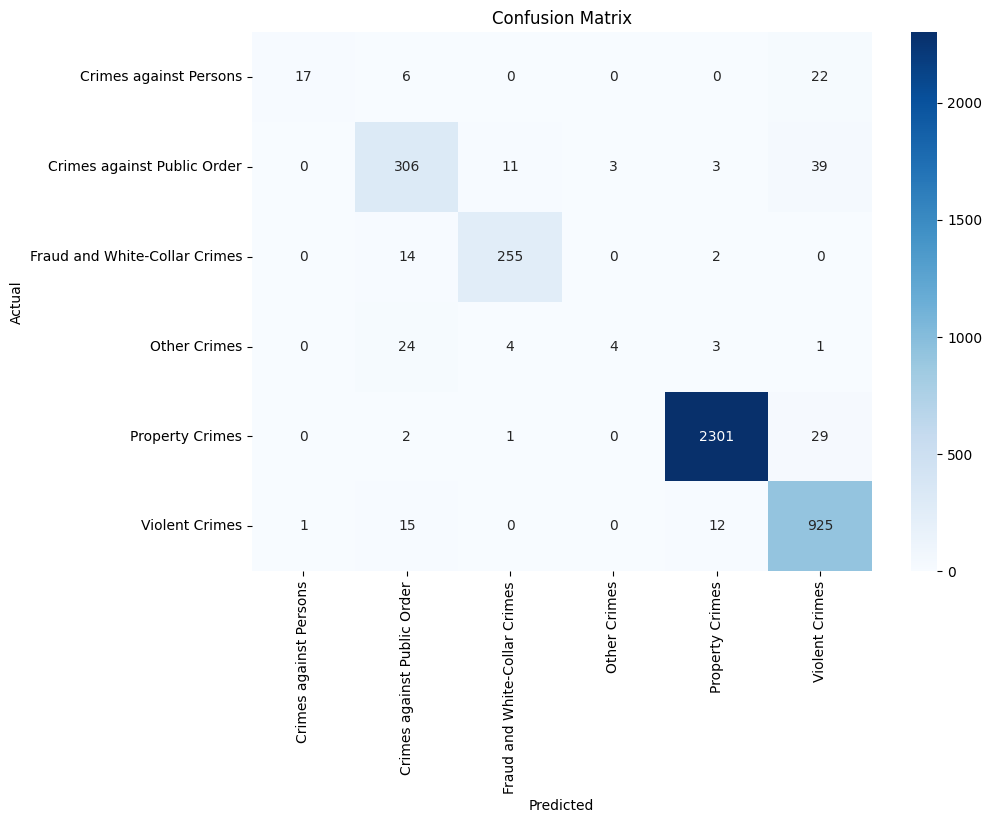

In [27]:

rf_clf = RandomForestClassifier(random_state=42)


rf_clf.fit(X_train_rfecv, y_train)


y_pred = rf_clf.predict(X_test_rfecv)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Best Parameters: {'bootstrap': True, 'max_depth': 18, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 122}
Accuracy after hyperparameter tuning: 0.9517
Classification Report after hyperparameter tuning:
                               precision    recall  f1-score   support

       Crimes against Persons       0.81      0.47      0.59        45
  Crimes against Public Order       0.84      0.87      0.86       362
Fraud and White-Collar Crimes       0.93      0.94      0.94       271
                 Other Crimes       0.64      0.19      0.30        36
              Property Crimes       0.99      0.98      0.99      2333
               Violent Crimes       0.91      0.96      0.94       953

                     accuracy                           0.95      4000
                    macro avg       0.85      0.74      0.77      4000
                 weighted avg       0.95      0.95      0.95      4000



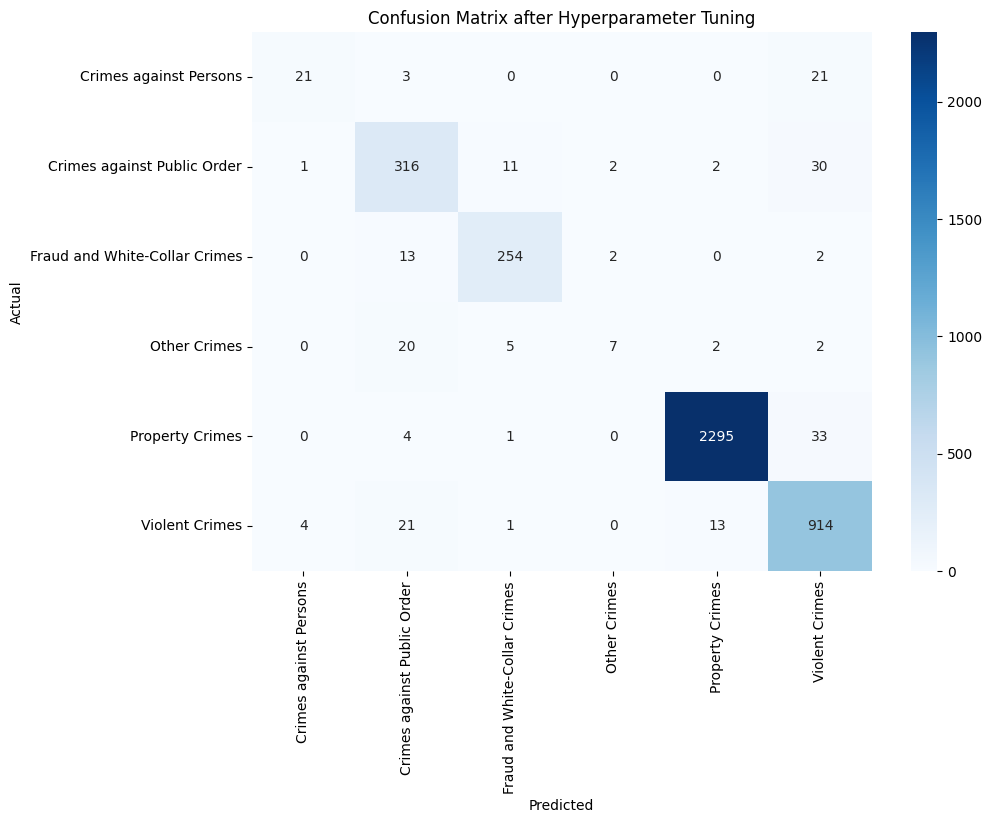

In [28]:

param_grid = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, n_iter=50, cv=5,random_state=42, n_jobs=-1)


random_search.fit(X_train_rfecv, y_train)


best_rf_clf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


y_pred_best = best_rf_clf.predict(X_test_rfecv)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy after hyperparameter tuning: {accuracy_best:.4f}")

print("Classification Report after hyperparameter tuning:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after Hyperparameter Tuning')
plt.show()


In [29]:

X_test_full = pipeline.transform(test_data)
print("Test data preprocessing done")

X_test_full = pd.DataFrame(X_test_full, columns=feature_names)

X_test_rfecv1 = X_test_full[selected_columns_after_rfecv].to_numpy()
print("Feature selection done")

y_pred_test_data = best_rf_clf.predict(X_test_rfecv1)
print("Prediction done")
y_pred_test_data_decoded = label_encoder.inverse_transform(y_pred_test_data)

Test data preprocessing done
Feature selection done
Prediction done


In [30]:
'''submission = pd.DataFrame({
    'ID': range(1, len(y_pred_test_data_decoded) + 1),  # Using index as ID
    'Crime_Category': y_pred_test_data_decoded
})
# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)'''

"submission = pd.DataFrame({\n    'ID': range(1, len(y_pred_test_data_decoded) + 1),  # Using index as ID\n    'Crime_Category': y_pred_test_data_decoded\n})\n# Save the submission DataFrame to a CSV file\nsubmission.to_csv('submission.csv', index=False)"

# KNN Model

In [35]:

knn_clf = KNeighborsClassifier()


knn_clf.fit(X_train_rfecv, y_train)


y_pred = knn_clf.predict(X_test_rfecv)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.888
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.47      0.51        45
           1       0.73      0.78      0.76       362
           2       0.91      0.82      0.86       271
           3       0.23      0.08      0.12        36
           4       0.93      0.94      0.94      2333
           5       0.86      0.87      0.86       953

    accuracy                           0.89      4000
   macro avg       0.70      0.66      0.68      4000
weighted avg       0.88      0.89      0.89      4000

Confusion Matrix:
 [[  21    3    0    2    1   18]
 [   3  284    9    2   36   28]
 [   0   17  223    1   29    1]
 [   1   11    1    3   17    3]
 [   0   39   10    4 2190   90]
 [  13   33    2    1   73  831]]


In [36]:

param_dist = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


random_search = RandomizedSearchCV(knn_clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_rfecv, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


best_knn_clf = random_search.best_estimator_

best_y_pred = best_knn_clf.predict(X_test_rfecv)

print("Best Model Accuracy:", accuracy_score(y_test, best_y_pred))
print("Best Model Classification Report:\n", classification_report(y_test, best_y_pred))
print("Best Model Confusion Matrix:\n", confusion_matrix(y_test, best_y_pred))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best Score: 0.8942499999999999
Best Model Accuracy: 0.90025
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.42      0.49        45
           1       0.78      0.77      0.77       362
           2       0.94      0.84      0.89       271
           3       0.33      0.14      0.20        36
           4       0.93      0.96      0.95      2333
           5       0.87      0.88      0.87       953

    accuracy                           0.90      4000
   macro avg       0.74      0.67      0.69      4000
weighted avg       0.90      0.90      0.90      4000

Best Model Confusion Matrix:
 [[  19    4    0    1    0   21]
 [   2  277    5    4   40   34]
 [   0   16  227    1   26    1]
 [   1   12    2    5   13    3]
 [   0   23    6    3 2237   64]
 [  10   25    1    1   80  836]]


# SVM Model Full

In [37]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_rfecv, y_train)
y_pred_svm = svm_clf.predict(X_test_rfecv)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.92875
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.36      0.48        45
           1       0.80      0.83      0.82       362
           2       0.90      0.92      0.91       271
           3       0.60      0.08      0.15        36
           4       0.98      0.96      0.97      2333
           5       0.88      0.94      0.91       953

    accuracy                           0.93      4000
   macro avg       0.81      0.68      0.71      4000
weighted avg       0.93      0.93      0.92      4000

SVM Confusion Matrix:
 [[  16    4    0    0    0   25]
 [   2  301   15    1   11   32]
 [   0   15  250    1    4    1]
 [   1   17    6    3    6    3]
 [   0   15    3    0 2249   66]
 [   3   22    3    0   29  896]]


Best Parameters for SVM: {'C': 2.3305614317972307, 'gamma': 0.009284941037040624, 'kernel': 'rbf'}
Best SVM Accuracy: 0.934
Best SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.40      0.54        45
           1       0.79      0.84      0.82       362
           2       0.92      0.92      0.92       271
           3       0.50      0.14      0.22        36
           4       0.98      0.97      0.98      2333
           5       0.89      0.94      0.92       953

    accuracy                           0.93      4000
   macro avg       0.82      0.70      0.73      4000
weighted avg       0.93      0.93      0.93      4000

Best SVM Confusion Matrix:
 [[  18    5    0    0    0   22]
 [   2  305   14    3   10   28]
 [   0   17  248    2    3    1]
 [   0   18    5    5    6    2]
 [   0   14    2    0 2263   54]
 [   2   26    1    0   27  897]]


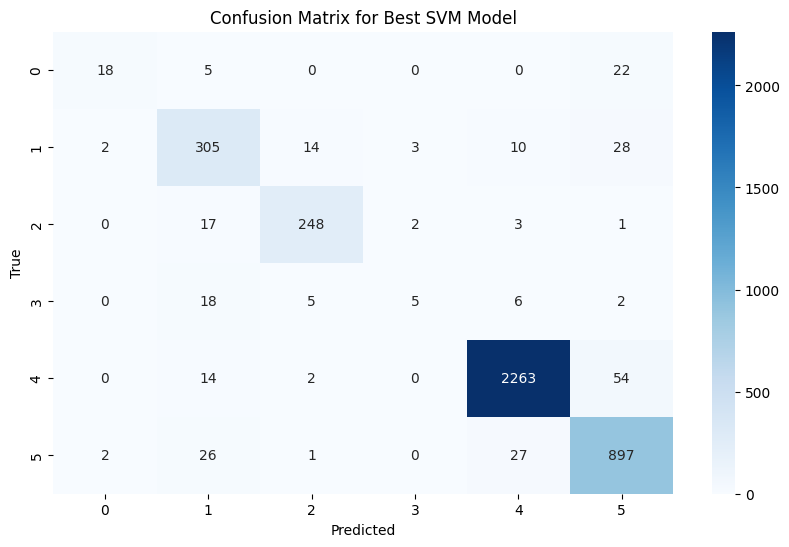

In [38]:
from sklearn.model_selection import RandomizedSearchCV


param_distributions_svm = {
    'C': loguniform(1e-3, 1e3),  
    'gamma': ['scale', 'auto'] + list(loguniform(1e-3, 1).rvs(size=10)), 
    'kernel': ['rbf', 'poly', 'sigmoid']  
}


random_search_svm = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_distributions_svm,
    n_iter=50,  
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


random_search_svm.fit(X_train_rfecv, y_train)


best_svm_model = random_search_svm.best_estimator_
print("Best Parameters for SVM:", random_search_svm.best_params_)


best_y_pred_svm = best_svm_model.predict(X_test_rfecv)
best_accuracy_svm = accuracy_score(y_test, best_y_pred_svm)
print("Best SVM Accuracy:", best_accuracy_svm)
print("Best SVM Classification Report:\n", classification_report(y_test, best_y_pred_svm))
print("Best SVM Confusion Matrix:\n", confusion_matrix(y_test, best_y_pred_svm))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, best_y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best SVM Model')
plt.show()


In [39]:

X_test_full = pipeline.transform(test_data)
print("Test data preprocessing done")

X_test_full = pd.DataFrame(X_test_full, columns=feature_names)
X_test_rfecv1 = X_test_full[selected_columns_after_rfecv].to_numpy()
print("Feature selection done")
y_pred_test_data = best_svm_model.predict(X_test_rfecv1)
print("Prediction done")
y_pred_test_data_decoded = label_encoder.inverse_transform(y_pred_test_data)

Test data preprocessing done
Feature selection done
Prediction done


In [40]:
'''submission = pd.DataFrame({
    'ID': range(1, len(y_pred_test_data_decoded) + 1),  # Using index as ID
    'Crime_Category': y_pred_test_data_decoded
})
# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)'''

"submission = pd.DataFrame({\n    'ID': range(1, len(y_pred_test_data_decoded) + 1),  # Using index as ID\n    'Crime_Category': y_pred_test_data_decoded\n})\n# Save the submission DataFrame to a CSV file\nsubmission.to_csv('submission.csv', index=False)"

# Bagging Classifier Model Full

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


bagging_clf.fit(X_train_rfecv, y_train)

y_pred_bagging = bagging_clf.predict(X_test_rfecv)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)
print("Bagging Classifier Classification Report:\n", classification_report(y_test, y_pred_bagging))
print("Bagging Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.951
Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.49      0.59        45
           1       0.84      0.86      0.85       362
           2       0.94      0.94      0.94       271
           3       0.55      0.31      0.39        36
           4       0.99      0.98      0.99      2333
           5       0.91      0.96      0.93       953

    accuracy                           0.95      4000
   macro avg       0.83      0.76      0.78      4000
weighted avg       0.95      0.95      0.95      4000

Bagging Classifier Confusion Matrix:
 [[  22    2    0    1    0   20]
 [   1  312   10    4    2   33]
 [   1   12  254    3    0    1]
 [   0   18    4   11    2    1]
 [   0    7    0    1 2294   31]
 [   6   20    1    0   15  911]]


Best Parameters for Bagging Classifier: {'n_estimators': 200, 'max_samples': 0.7, 'max_features': 0.7, 'bootstrap_features': False, 'bootstrap': False}
Best Bagging Classifier Accuracy: 0.95325
Best Bagging Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.44      0.59        45
           1       0.86      0.85      0.85       362
           2       0.95      0.93      0.94       271
           3       0.73      0.22      0.34        36
           4       0.99      0.99      0.99      2333
           5       0.91      0.97      0.94       953

    accuracy                           0.95      4000
   macro avg       0.89      0.73      0.78      4000
weighted avg       0.95      0.95      0.95      4000

Best Bagging Classifier Confusion Matrix:
 [[  20    4    0    0    0   21]
 [   0  306   10    3    4   39]
 [   0   11  252    0    8    0]
 [   0   18    1    8    7    2]
 [   0    3    1    0 2301   28]
 [   3 

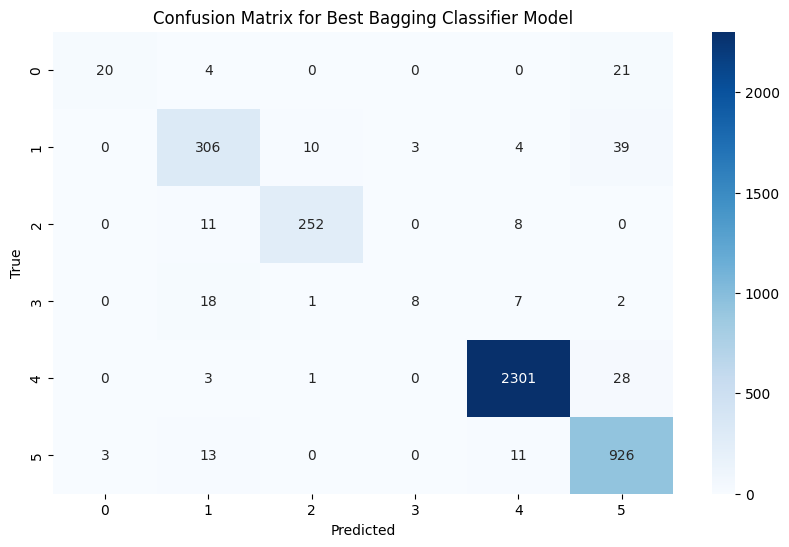

In [42]:
param_dist_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}


random_search_bagging = RandomizedSearchCV(
    BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42),
    param_distributions=param_dist_bagging,
    n_iter=50, 
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


random_search_bagging.fit(X_train_rfecv, y_train)


best_bagging_model = random_search_bagging.best_estimator_
print("Best Parameters for Bagging Classifier:", random_search_bagging.best_params_)


best_y_pred_bagging = best_bagging_model.predict(X_test_rfecv)
best_accuracy_bagging = accuracy_score(y_test, best_y_pred_bagging)
print("Best Bagging Classifier Accuracy:", best_accuracy_bagging)
print("Best Bagging Classifier Classification Report:\n", classification_report(y_test, best_y_pred_bagging))
print("Best Bagging Classifier Confusion Matrix:\n", confusion_matrix(y_test, best_y_pred_bagging))


plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, best_y_pred_bagging), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Bagging Classifier Model')
plt.show()


In [43]:
X_test_full = pipeline.transform(test_data)
print("Test data preprocessing done")

X_test_full = pd.DataFrame(X_test_full, columns=feature_names)

X_test_rfecv1 = X_test_full[selected_columns_after_rfecv].to_numpy()
print("Feature selection done")

y_pred_test_data = best_bagging_model.predict(X_test_rfecv1)
print("Prediction done")

y_pred_test_data_decoded = label_encoder.inverse_transform(y_pred_test_data)

Test data preprocessing done
Feature selection done
Prediction done


In [44]:
'''submission = pd.DataFrame({
    'ID': range(1, len(y_pred_test_data_decoded) + 1),  # Using index as ID
    'Crime_Category': y_pred_test_data_decoded
})
# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)'''

"submission = pd.DataFrame({\n    'ID': range(1, len(y_pred_test_data_decoded) + 1),  # Using index as ID\n    'Crime_Category': y_pred_test_data_decoded\n})\n# Save the submission DataFrame to a CSV file\nsubmission.to_csv('submission.csv', index=False)"

# Gradient Boosting Model

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train_rfecv, y_train)

y_pred_gbc = gbc.predict(X_test_rfecv)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Accuracy:", accuracy_gbc)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gbc))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))


Gradient Boosting Classifier Accuracy: 0.94925
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.44      0.51        45
           1       0.84      0.84      0.84       362
           2       0.94      0.93      0.93       271
           3       0.43      0.25      0.32        36
           4       0.99      0.99      0.99      2333
           5       0.92      0.96      0.94       953

    accuracy                           0.95      4000
   macro avg       0.78      0.73      0.75      4000
weighted avg       0.95      0.95      0.95      4000

Gradient Boosting Confusion Matrix:
 [[  20    3    0    2    0   20]
 [   5  305   10    6    2   34]
 [   0   18  251    1    0    1]
 [   1   20    3    9    2    1]
 [   1    3    1    1 2300   27]
 [   7   15    1    2   16  912]]


Best Parameters for Gradient Boosting: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Best Gradient Boosting Classifier Accuracy: 0.95125
Best Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        45
           1       0.85      0.85      0.85       362
           2       0.93      0.94      0.93       271
           3       0.42      0.22      0.29        36
           4       0.99      0.99      0.99      2333
           5       0.93      0.95      0.94       953

    accuracy                           0.95      4000
   macro avg       0.78      0.75      0.76      4000
weighted avg       0.95      0.95      0.95      4000

Best Gradient Boosting Confusion Matrix:
 [[  24    2    0    2    0   17]
 [   5  307   14    6    2   28]
 [   3   12  254    1    0    1]
 [   1   19    5    8    2    1]
 [   1    4    1    0 2303   24]
 [   8   16    0    2   18  909]]


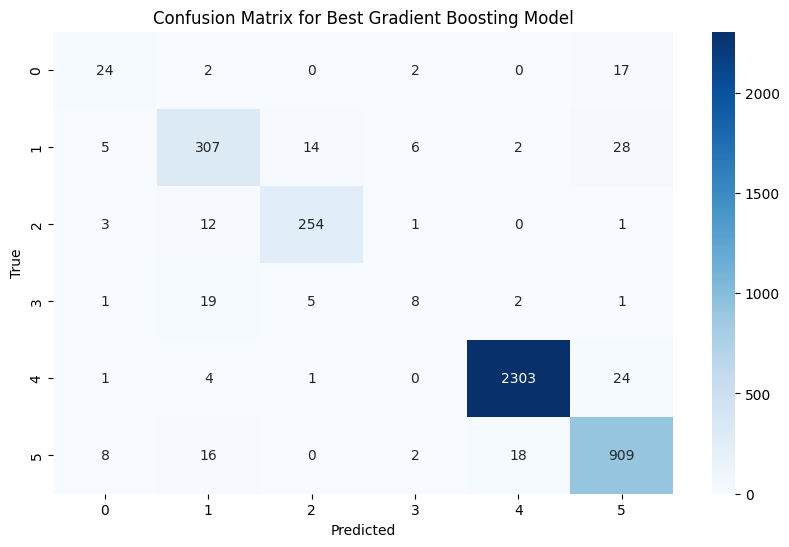

In [46]:
from sklearn.model_selection import RandomizedSearchCV


param_dist_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5]
}


random_search_gbc = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist_gbc,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)


random_search_gbc.fit(X_train_rfecv, y_train)


best_gbc_model = random_search_gbc.best_estimator_
print("Best Parameters for Gradient Boosting:", random_search_gbc.best_params_)


best_y_pred_gbc = best_gbc_model.predict(X_test_rfecv)
best_accuracy_gbc = accuracy_score(y_test, best_y_pred_gbc)
print("Best Gradient Boosting Classifier Accuracy:", best_accuracy_gbc)
print("Best Gradient Boosting Classification Report:\n", classification_report(y_test, best_y_pred_gbc))
print("Best Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, best_y_pred_gbc))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, best_y_pred_gbc), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Gradient Boosting Model')
plt.show()

In [48]:

X_test_full = pipeline.transform(test_data)
print("Test data preprocessing done")

X_test_full = pd.DataFrame(X_test_full, columns=feature_names)

X_test_rfecv1 = X_test_full[selected_columns_after_rfecv].to_numpy()
print("Feature selection done")

y_pred_test_data = best_gbc_model.predict(X_test_rfecv1)
print("Prediction done")

y_pred_test_data_decoded = label_encoder.inverse_transform(y_pred_test_data)

Test data preprocessing done
Feature selection done
Prediction done


# XGBoost Model

XGBoost Test Set Accuracy:  0.9535
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.44      0.56        45
           1       0.85      0.85      0.85       362
           2       0.94      0.93      0.94       271
           3       0.47      0.25      0.33        36
           4       0.99      0.99      0.99      2333
           5       0.92      0.97      0.94       953

    accuracy                           0.95      4000
   macro avg       0.82      0.74      0.77      4000
weighted avg       0.95      0.95      0.95      4000

XGBoost Confusion Matrix:
 [[  20    2    0    1    0   22]
 [   2  309   12    5    2   32]
 [   0   13  252    4    2    0]
 [   0   20    3    9    2    2]
 [   0    3    0    0 2303   27]
 [   4   18    0    0   10  921]]


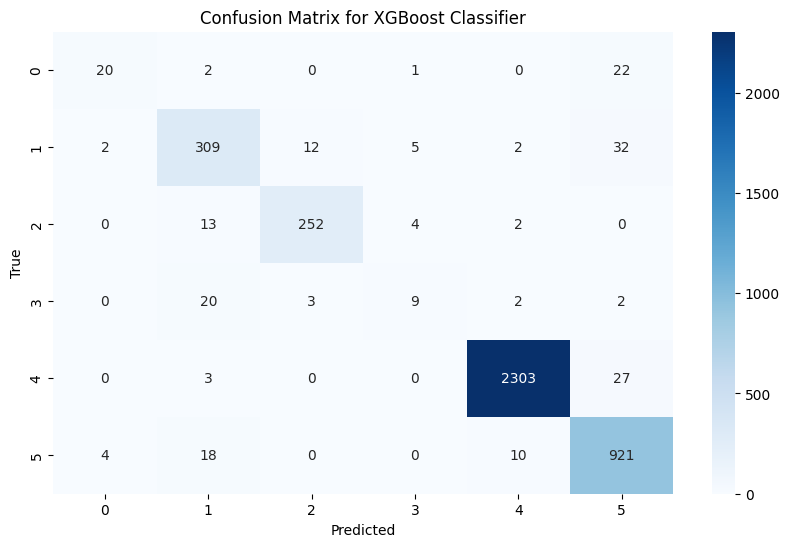

In [49]:

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), random_state=42)

xgb_clf.fit(X_train_rfecv, y_train)


y_pred_xgb = xgb_clf.predict(X_test_rfecv)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Test Set Accuracy: ", accuracy_xgb)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [ ]:

simplified_param_grid = {
    'learning_rate': [0.1, 0.2], 
    'max_depth': [3, 6],
    'n_estimators': [100, 150],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [1.0], 
    'min_child_weight': [1, 2],  
    'gamma': [0, 0.1]  
}

simplified_grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train)), random_state=42),
    param_grid=simplified_param_grid,
    cv=3,  
    scoring='accuracy',
    n_jobs=-1
)


simplified_grid_search_xgb.fit(X_train_rfecv, y_train)


best_xgb_model_simplified = simplified_grid_search_xgb.best_estimator_
print("Best Parameters for XGBoost (Simplified GridSearchCV):", simplified_grid_search_xgb.best_params_)

y_pred_best_xgb_simplified = best_xgb_model_simplified.predict(X_test_rfecv)
accuracy_best_xgb_simplified = accuracy_score(y_test, y_pred_best_xgb_simplified)
print("Best XGBoost Test Set Accuracy (Simplified GridSearchCV): ", accuracy_best_xgb_simplified)
print("Best XGBoost Classification Report (Simplified GridSearchCV):\n", classification_report(y_test, y_pred_best_xgb_simplified))
print("Best XGBoost Confusion Matrix (Simplified GridSearchCV):\n", confusion_matrix(y_test, y_pred_best_xgb_simplified))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best_xgb_simplified), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best XGBoost Model (Simplified GridSearchCV)')
plt.show()


In [ ]:

X_test_full = pipeline.transform(test_data)
print("Test data preprocessing done")

X_test_full = pd.DataFrame(X_test_full, columns=feature_names)

X_test_rfecv1 = X_test_full[selected_columns_after_rfecv].to_numpy()
print("Feature selection done")

y_pred_test_data = best_xgb_model_simplified.predict(X_test_rfecv1)
print("Prediction done")

y_pred_test_data_decoded = label_encoder.inverse_transform(y_pred_test_data)


# LGBM Classifier Full

In [19]:
import lightgbm as lgb


lgbm_clf = lgb.LGBMClassifier(random_state=42)

lgbm_clf.fit(X_train_rfecv, y_train)

y_pred_lgbm = lgbm_clf.predict(X_test_rfecv)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Classifier Accuracy:", accuracy_lgbm)
print("LightGBM Classifier Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("LightGBM Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10448
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 106
[LightGBM] [Info] Start training from score -4.487387
[LightGBM] [Info] Start training from score -2.403788
[LightGBM] [Info] Start training from score -2.691931
[LightGBM] [Info] Start training from score -4.717499
[LightGBM] [Info] Start training from score -0.539032
[LightGBM] [Info] Start training from score -1.433910
LightGBM Classifier Accuracy: 0.9545
LightGBM Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        45
           1       0.84      0.87      0.85       362
           2       0.95      0.93      0.94       271
           3       0.45

Best Parameters for LightGBM: {'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 31, 'n_estimators': 100, 'min_split_gain': 0.0, 'min_child_weight': 0.001, 'learning_rate': 0.05}
Best LightGBM Accuracy: 0.955
Best LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.47      0.58        45
           1       0.85      0.88      0.86       362
           2       0.94      0.93      0.94       271
           3       0.35      0.17      0.23        36
           4       0.99      0.99      0.99      2333
           5       0.93      0.96      0.94       953

    accuracy                           0.95      4000
   macro avg       0.80      0.73      0.76      4000
weighted avg       0.95      0.95      0.95      4000

Best LightGBM Confusion Matrix:
 [[  21    3    0    1    0   20]
 [   0  317    9    6    3   27]
 [   0   14  253    4    0    0]
 [   0   20    6    6    2    2]
 [   0    2    1    0 2305   25]
 [   7   16

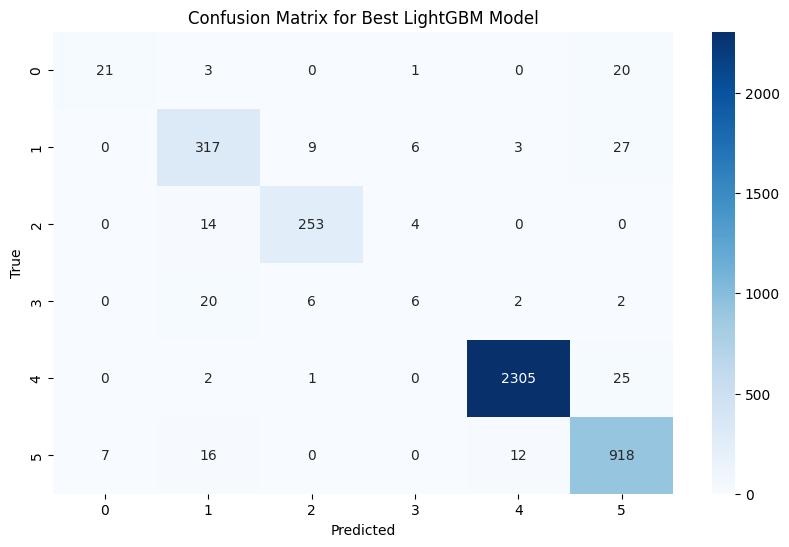

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_lgbm = {
    'num_leaves': [31, 62, 127],
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0],
    'min_split_gain': [0.0, 0.1],
    'min_child_weight': [0.001, 0.01],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

random_search_lgbm = RandomizedSearchCV(
    lgb.LGBMClassifier(random_state=42, verbose=-1),
    param_distributions=param_dist_lgbm,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search_lgbm.fit(X_train_rfecv, y_train)

best_lgbm_model = random_search_lgbm.best_estimator_
print("Best Parameters for LightGBM:", random_search_lgbm.best_params_)

best_y_pred_lgbm = best_lgbm_model.predict(X_test_rfecv)
best_accuracy_lgbm = accuracy_score(y_test, best_y_pred_lgbm)
print("Best LightGBM Accuracy:", best_accuracy_lgbm)
print("Best LightGBM Classification Report:\n", classification_report(y_test, best_y_pred_lgbm))
print("Best LightGBM Confusion Matrix:\n", confusion_matrix(y_test, best_y_pred_lgbm))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, best_y_pred_lgbm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best LightGBM Model')
plt.show()


In [21]:
X_test_full = pipeline.transform(test_data)
print("Test data preprocessing done")

X_test_full = pd.DataFrame(X_test_full, columns=feature_names)


X_test_rfecv1 = X_test_full[selected_columns_after_rfecv].to_numpy()
print("Feature selection done")

y_pred_test_data = best_lgbm_model.predict(X_test_rfecv1)
print("Prediction done")

y_pred_test_data_decoded = label_encoder.inverse_transform(y_pred_test_data)

Test data preprocessing done
Feature selection done
Prediction done


In [ ]:
'''submission = pd.DataFrame({
    'ID': range(1, len(y_pred_test_data_decoded) + 1),  # Using index as ID
    'Crime_Category': y_pred_test_data_decoded
})
# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)'''

# Model Performance Comparison

In [2]:

data = {
    'Model': [
        'Logistic Regression', 'Random Forest', 'KNN', 'SVM', 
        'Bagging', 'XGB', 'Gradient Boosting', 'LGBM'
    ],
    'Accuracy using X_test': [0.936, 0.957, 0.8942, 0.9417, 0.955, 0.954, 0.9515, 0.956],
    'Final Accuracy using test data': [0.936, 0.9488, 0.895, 0.9364, 0.9478, 0.951, 0.9458, 0.9534],
    'Total Time (min)': [25, 11, 7.5, 33.5, 21, 8.5, 28, 17.5]
}

df = pd.DataFrame(data)

df.head(10)


,Model,Accuracy using X_test,Final Accuracy using test data,Total Time (min)
0,Logistic Regression,0.9360,0.9360,25.0
1,Random Forest,0.9570,0.9488,11.0
2,KNN,0.8942,0.8950,7.5
3,SVM,0.9417,0.9364,33.5
4,Bagging,0.9550,0.9478,21.0
5,XGB,0.9540,0.9510,8.5
6,Gradient Boosting,0.9515,0.9458,28.0
7,LGBM,0.9560,0.9534,17.5


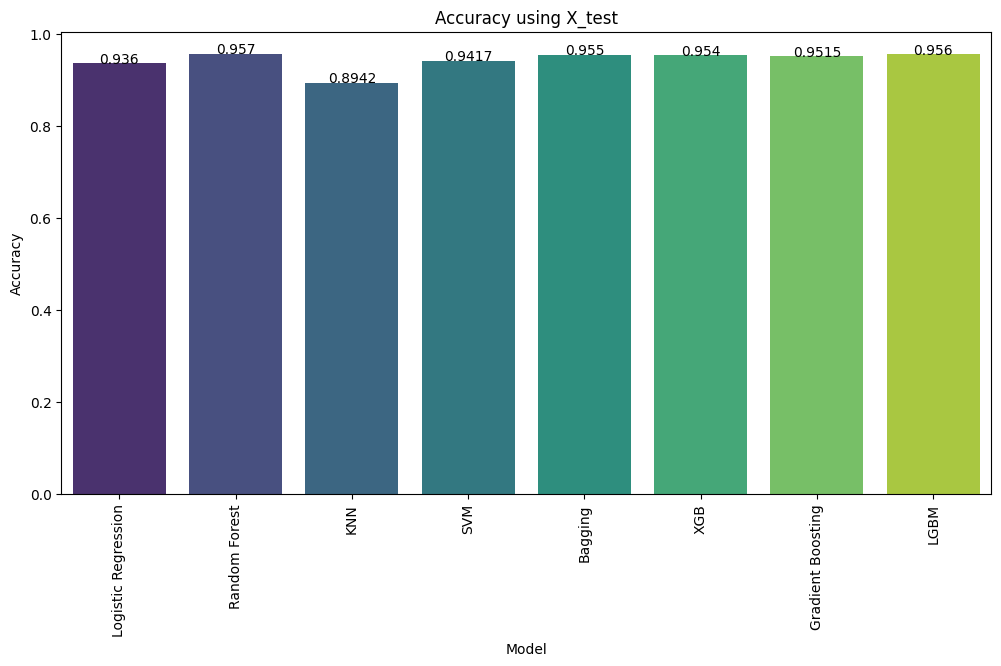

In [3]:

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='Accuracy using X_test', data=df, palette='viridis')
plt.title('Accuracy using X_test')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for index, row in df.iterrows():
    barplot.text(index, row['Accuracy using X_test'], round(row['Accuracy using X_test'], 4), color='black', ha="center")

plt.xticks(rotation=90)
plt.show()

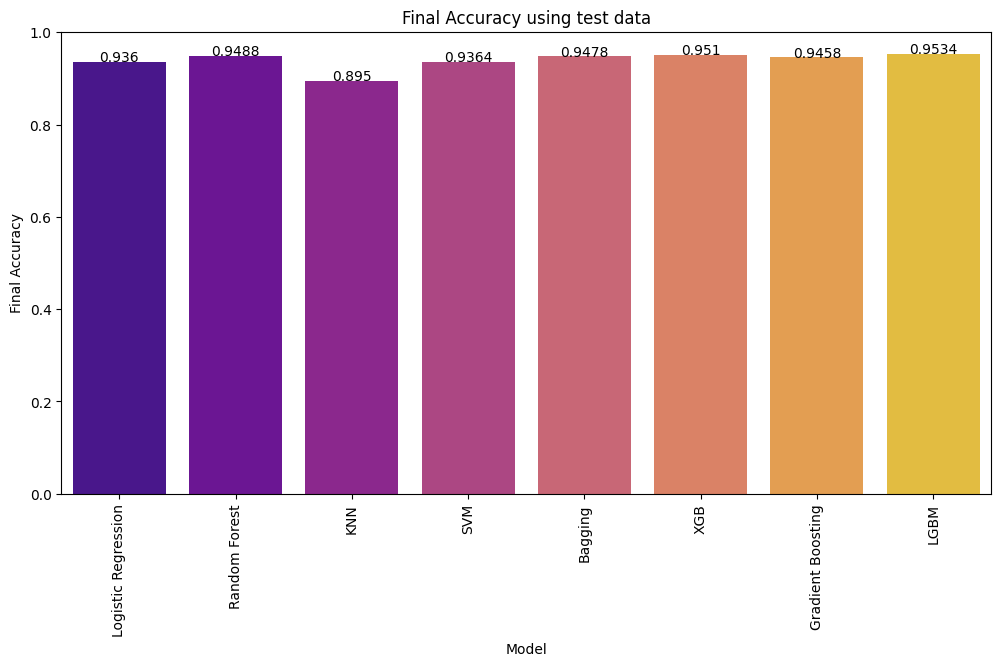

In [4]:

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='Final Accuracy using test data', data=df, palette='plasma')
plt.title('Final Accuracy using test data')
plt.xlabel('Model')
plt.ylabel('Final Accuracy')
for index, row in df.iterrows():
    barplot.text(index, row['Final Accuracy using test data'], round(row['Final Accuracy using test data'], 4), color='black', ha="center")
plt.xticks(rotation=90)
plt.show()

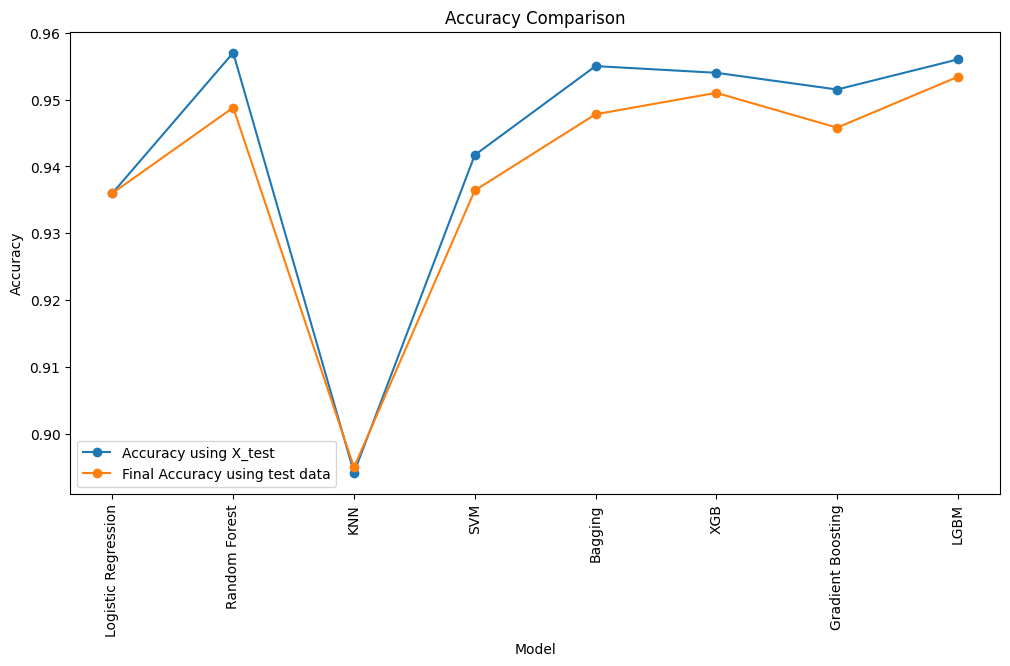

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Model'], df['Accuracy using X_test'], marker='o', label='Accuracy using X_test')
plt.plot(df['Model'], df['Final Accuracy using test data'], marker='o', label='Final Accuracy using test data')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=90)
plt.show()


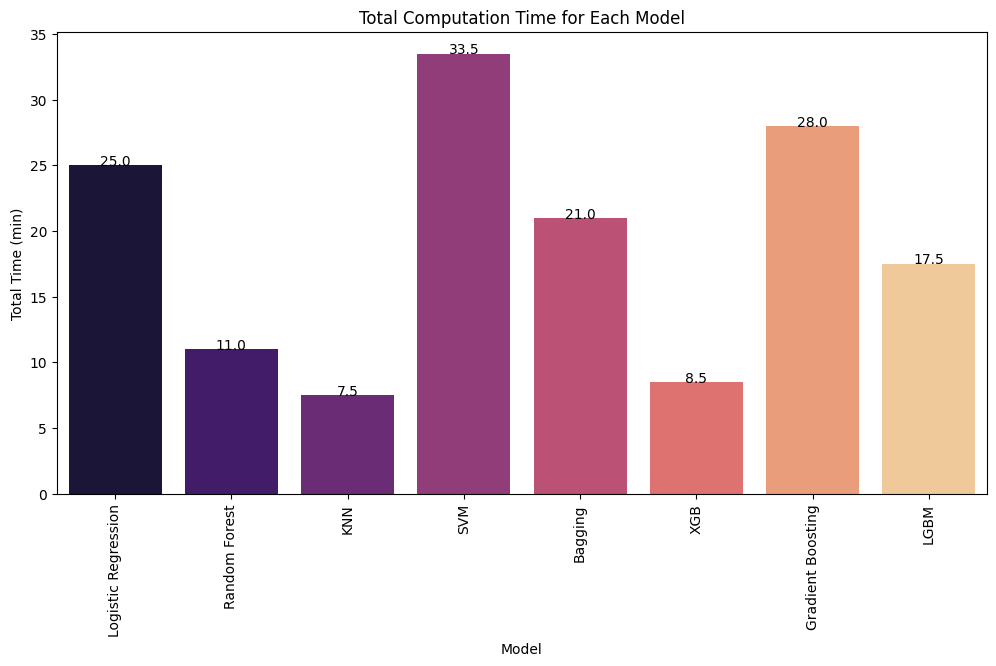

In [6]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='Total Time (min)', data=df, palette='magma')
plt.title('Total Computation Time for Each Model')
plt.xlabel('Model')
plt.ylabel('Total Time (min)')
for index, row in df.iterrows():
    barplot.text(index, row['Total Time (min)'], round(row['Total Time (min)'], 1), color='black', ha="center")
plt.xticks(rotation=90)
plt.show()

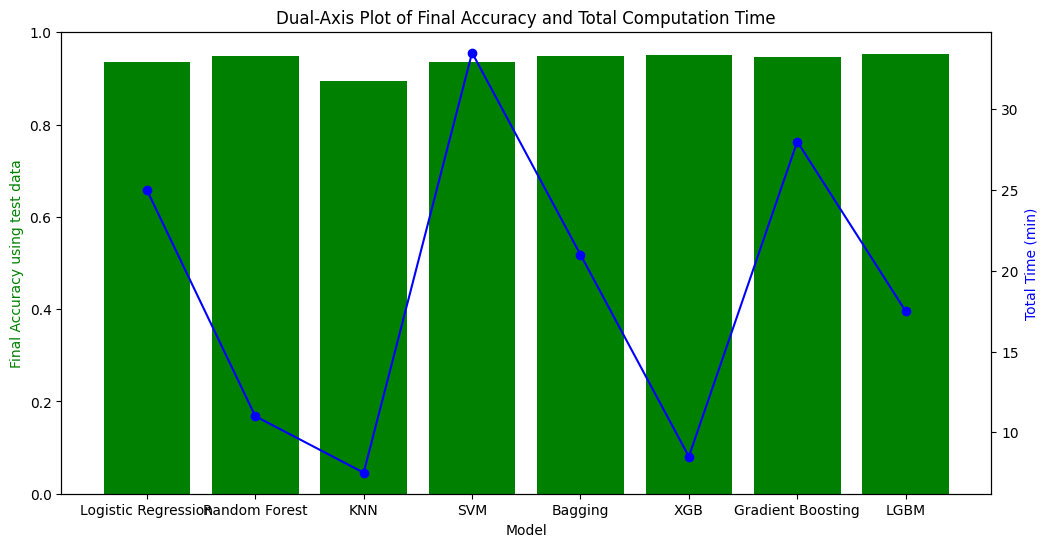

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(df['Model'], df['Final Accuracy using test data'], color='g')
ax2.plot(df['Model'], df['Total Time (min)'], color='b', marker='o')

ax1.set_xlabel('Model')
ax1.set_ylabel('Final Accuracy using test data', color='g')
ax2.set_ylabel('Total Time (min)', color='b')

plt.title('Dual-Axis Plot of Final Accuracy and Total Computation Time')
plt.show()


In [ ]:
'''submission = pd.DataFrame({
    'ID': range(1, len(y_pred_test_data_decoded) + 1),  # Using index as ID
    'Crime_Category': y_pred_test_data_decoded
})
# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)'''